In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
class Net(nn.Module):

    def __init__(self, num_classes=2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 30) 
        self.fc2 = nn.Linear(30, 30) 

        self.fc3 = nn.Linear(30, num_classes)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = (self.fc3(x))

        return x

model = Net(num_classes = 2)

In [ ]:
mean0 = (1, 1)
cov0 = [[1, 0], [0, 1]]

mean1 = (-1, -1)
cov1 = [[1, 0], [0, 1]]

data0 = np.random.multivariate_normal(mean0, cov0, 1000)
data1 = np.random.multivariate_normal(mean1, cov1, 1000)

dataset = [(torch.Tensor(point), torch.LongTensor([0])) for point in data0]
dataset += [(torch.Tensor(point), torch.LongTensor([1])) for point in data1]

In [ ]:
#uniform noise

mean0 = (1, 1)
sigma = 0.5
rho = sigma * sigma

cov0 = [[rho, 0], [0, rho]]

mean1 = (-1, -1)
cov1 = [[rho, 0], [0, rho]]

data0 = np.random.multivariate_normal(mean0, cov0, 1000)
data1 = np.random.multivariate_normal(mean1, cov1, 1000)

data = np.concatenate((data0, data1))
#data1[:,1] = data1[:,1] - 2
#print(data0)

input = torch.tensor(data).float()


label = [torch.LongTensor(np.random.binomial(1, 0.3, 1)) for point in data0]
label += [torch.LongTensor(np.random.binomial(1, 0.7, 1)) for point in data1]

label = torch.tensor(label)

In [ ]:

#uniform noise

mean0 = (1, 1)
sigma = 0.5
rho = sigma * sigma

cov0 = [[rho, 0], [0, rho]]

mean1 = (-1, -1)
cov1 = [[rho, 0], [0, rho]]

data0 = np.random.multivariate_normal(mean0, cov0, 1000)
data1 = np.random.multivariate_normal(mean1, cov1, 1000)

data = np.concatenate((data0, data1))
#data1[:,1] = data1[:,1] - 2
#print(data0)

input = torch.tensor(data).float()


label = [torch.LongTensor(np.random.binomial(1, 0.3, 1)) for point in data0]
label += [torch.LongTensor(np.random.binomial(1, 0.7, 1)) for point in data1]

label = torch.tensor(label)

In [ ]:
from torch.optim import Optimizer
import math

class Adam(Optimizer):


    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad)
        super(Adam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(Adam, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])


                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)
                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                step_size = group['lr'] / bias_correction1

                p.addcdiv_(exp_avg, denom, value=-step_size)


                update = (exp_avg / denom).view(-1)
                if update.shape[0] > 200:

                  y_number.append(update)
                  plt.hist(update.cpu())
                  plt.show()
                  plt.close()
                ###### Zhiyi THIS 'update' is the random variable we care about!

        return loss

step:  0


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


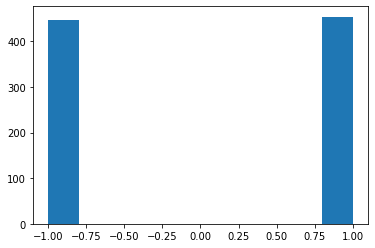

5.278420925140381 0.64 0.5404293537139893
step:  1


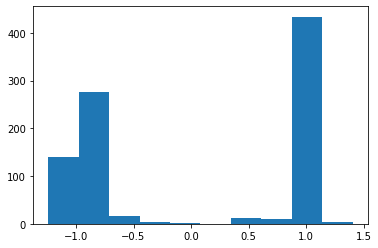

step:  2


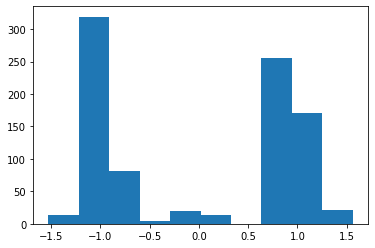

step:  3


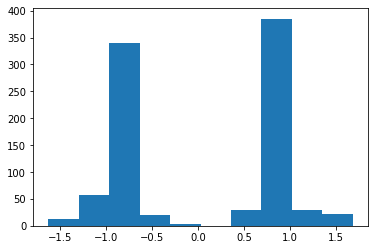

step:  4


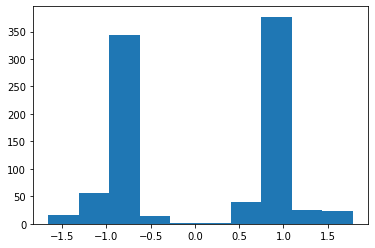

step:  5


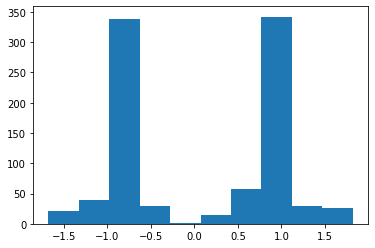

step:  6


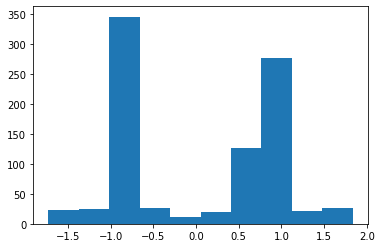

step:  7


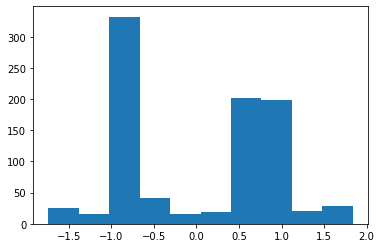

step:  8


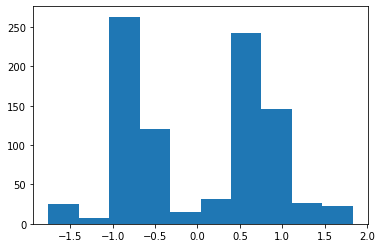

step:  9


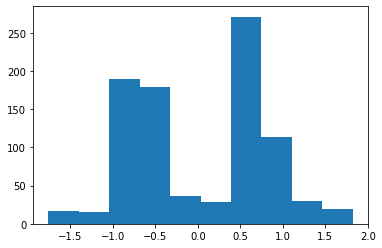

step:  10


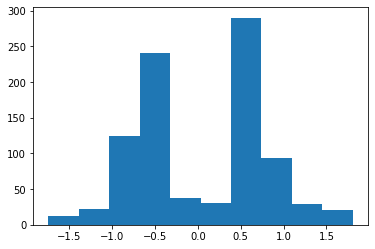

step:  11


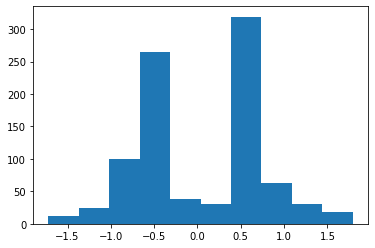

step:  12


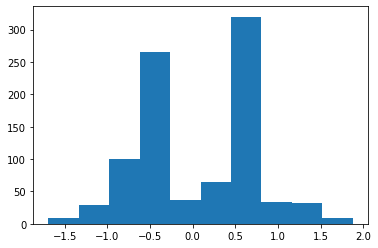

step:  13


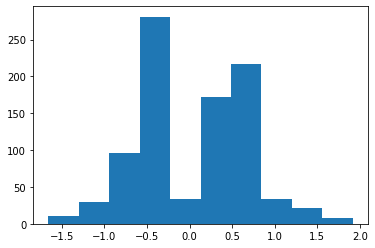

step:  14


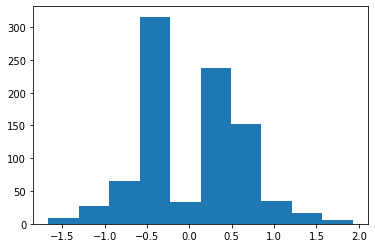

step:  15


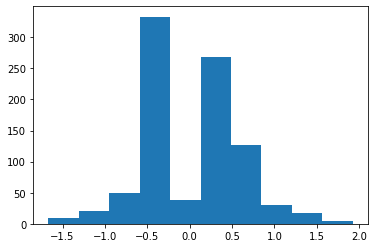

step:  16


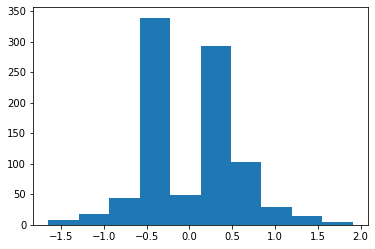

step:  17


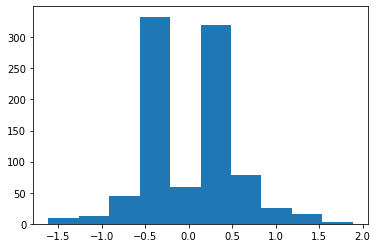

step:  18


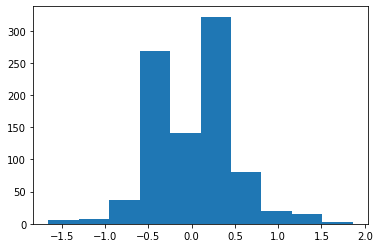

step:  19


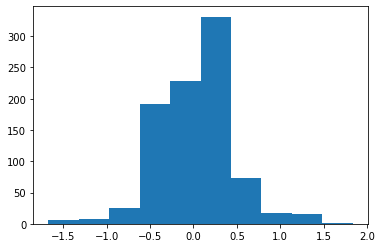

step:  20


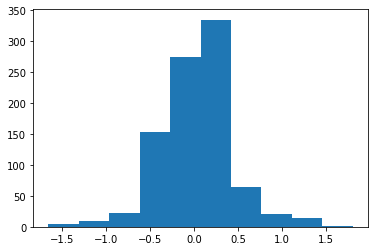

step:  21


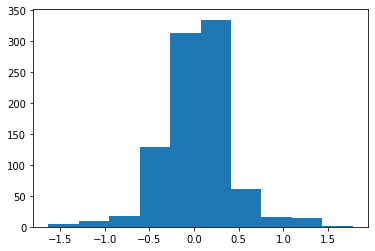

step:  22


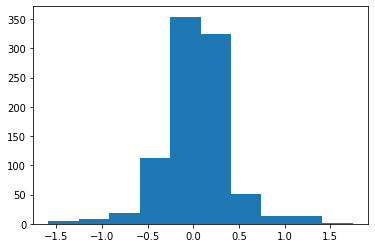

step:  23


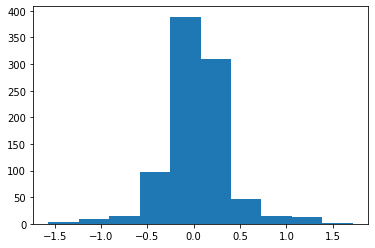

step:  24


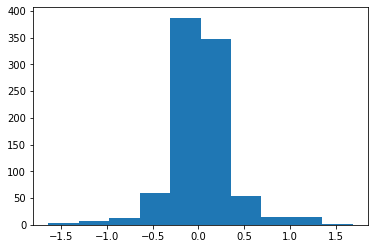

step:  25


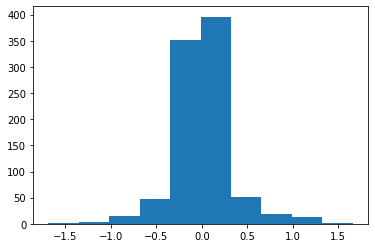

step:  26


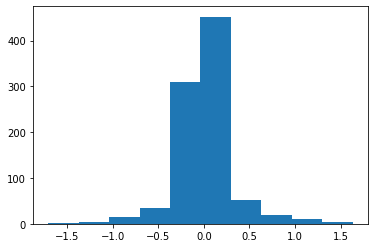

step:  27


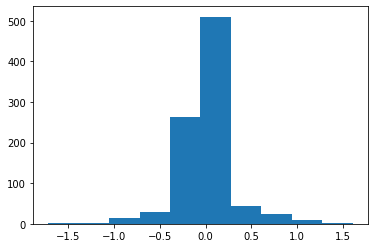

step:  28


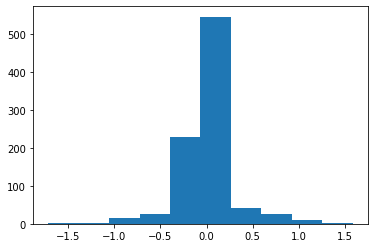

step:  29


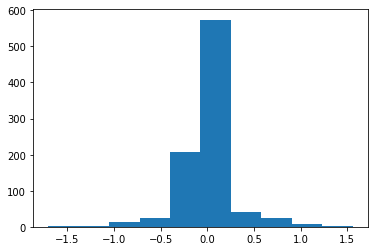

step:  30


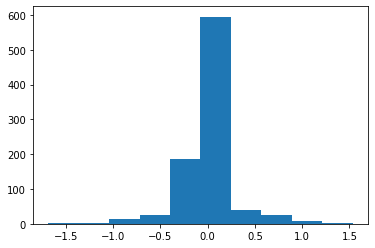

step:  31


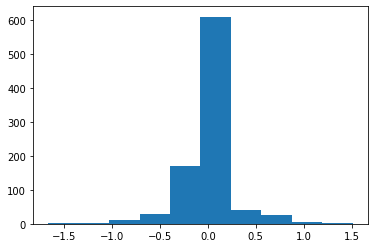

step:  32


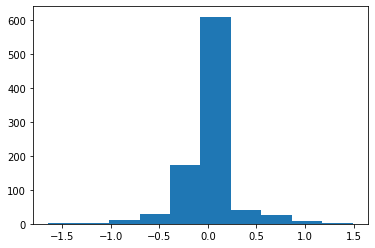

step:  33


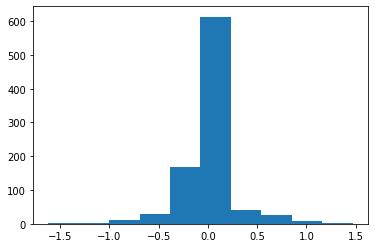

step:  34


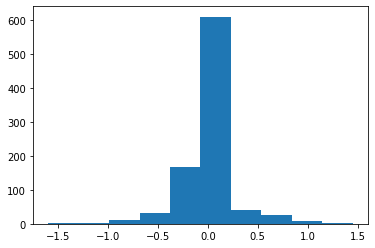

step:  35


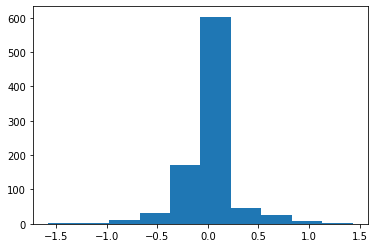

step:  36


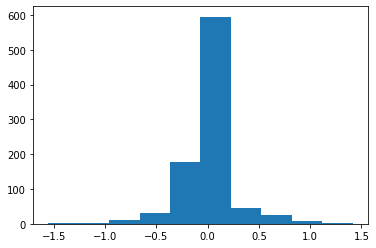

step:  37


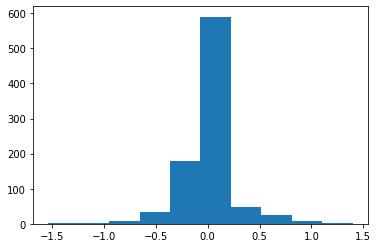

step:  38


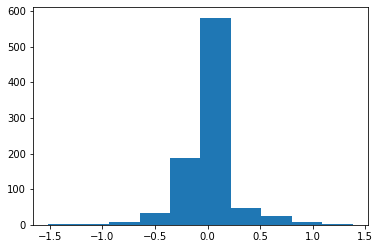

step:  39


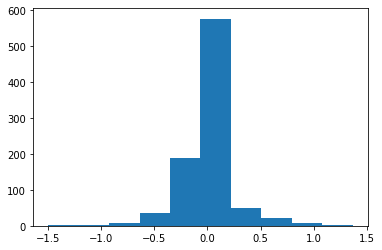

step:  40


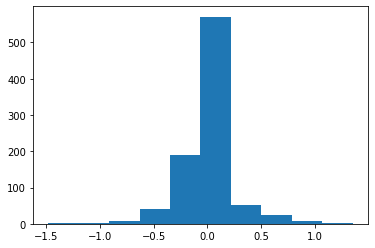

step:  41


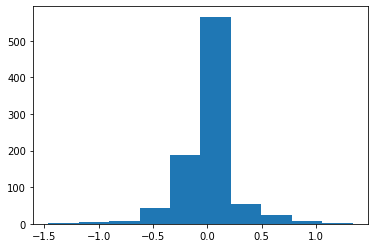

step:  42


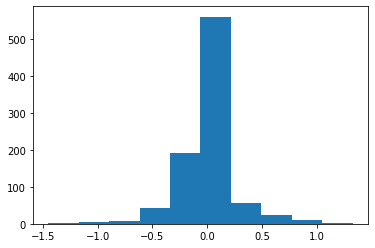

step:  43


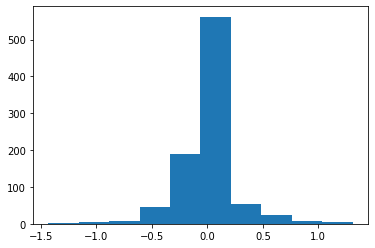

step:  44


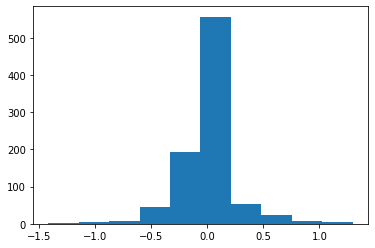

step:  45


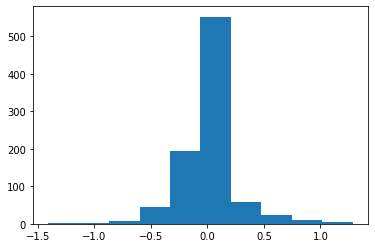

step:  46


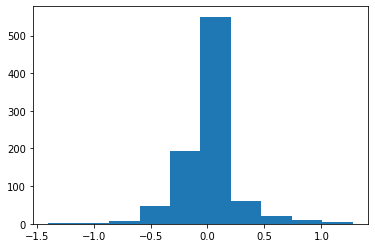

step:  47


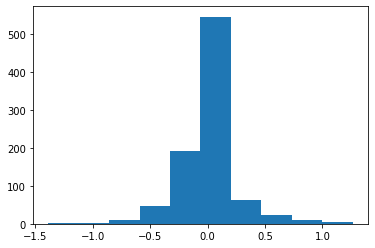

step:  48


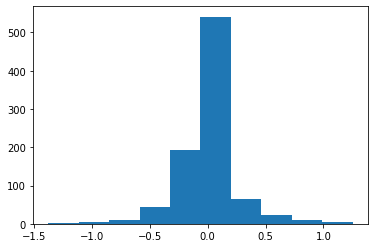

step:  49


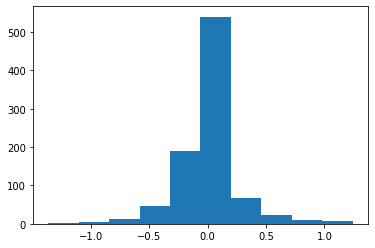

step:  50


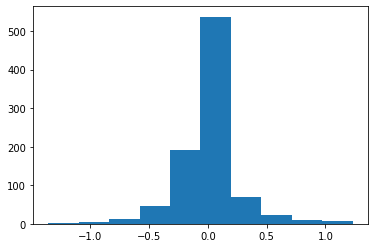

step:  51


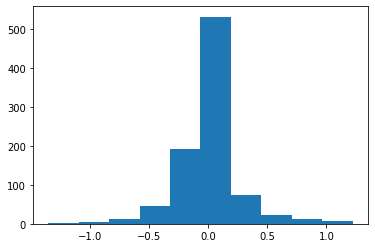

step:  52


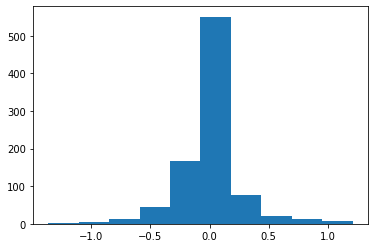

step:  53


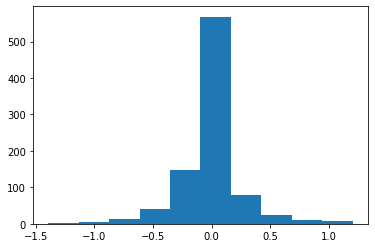

step:  54


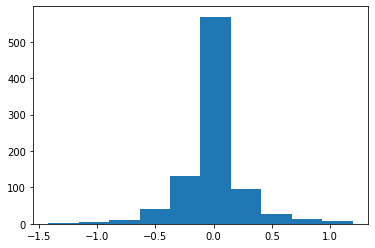

step:  55


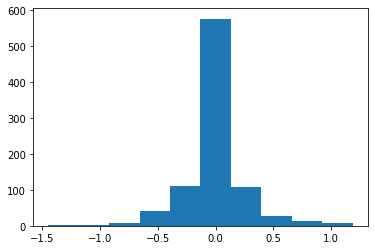

step:  56


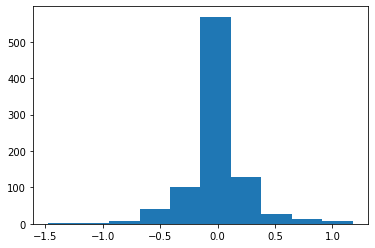

step:  57


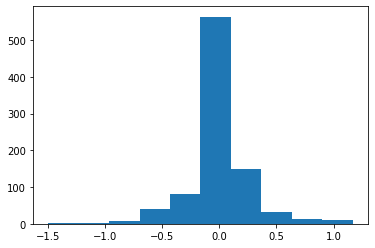

step:  58


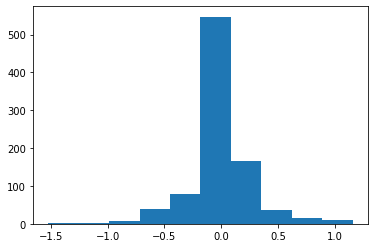

step:  59


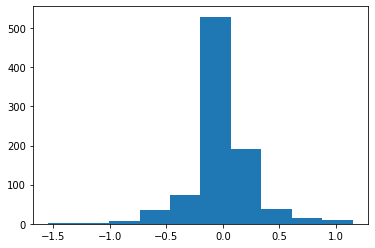

step:  60


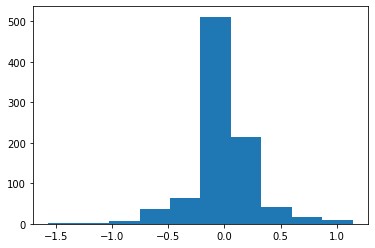

step:  61


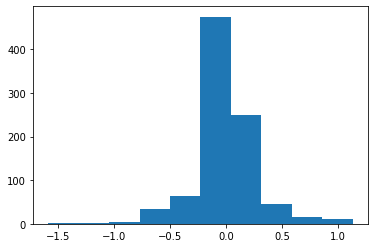

step:  62


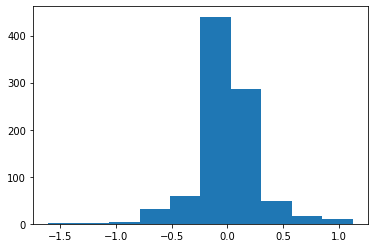

step:  63


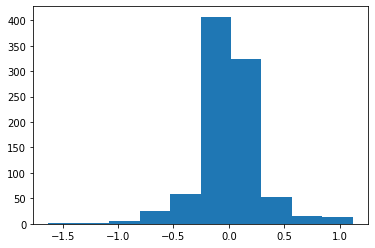

step:  64


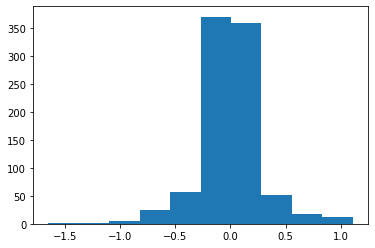

step:  65


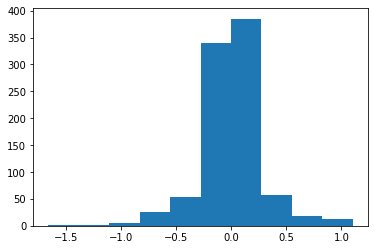

step:  66


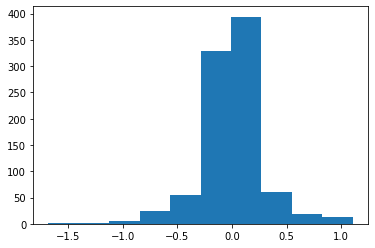

step:  67


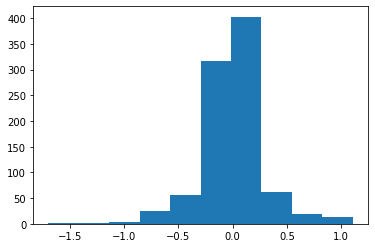

step:  68


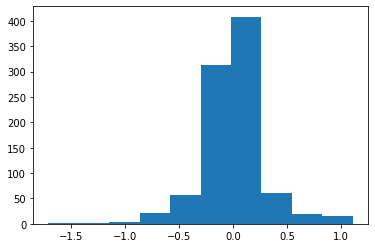

step:  69


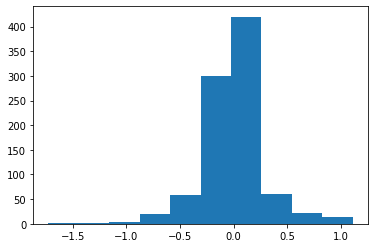

step:  70


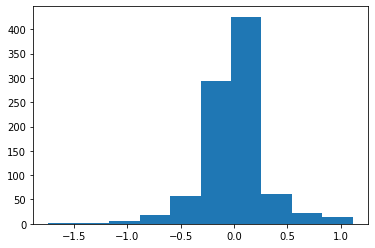

step:  71


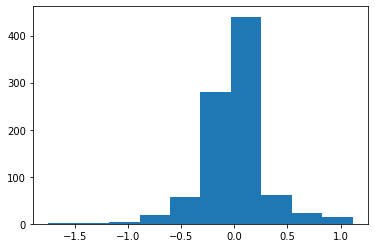

step:  72


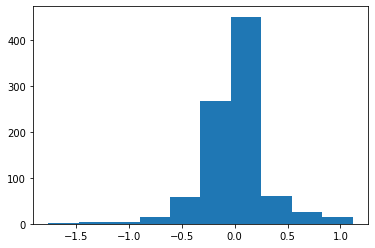

step:  73


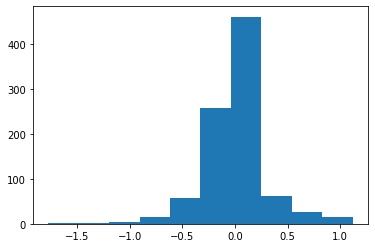

step:  74


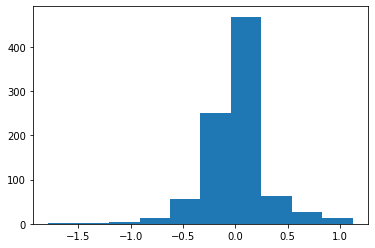

step:  75


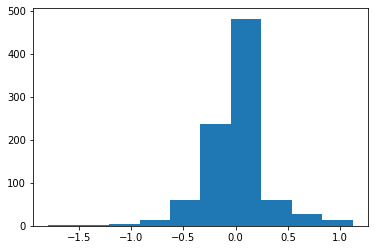

step:  76


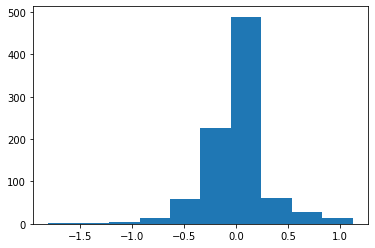

step:  77


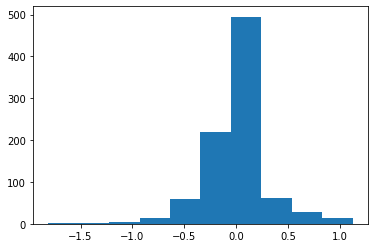

step:  78


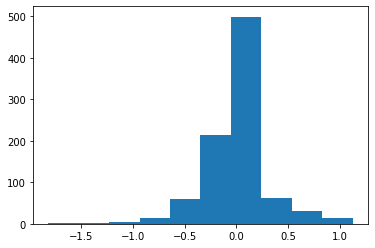

step:  79


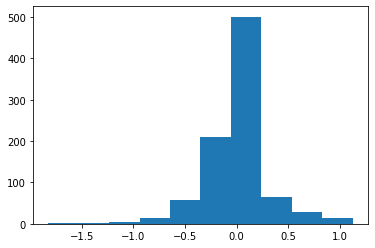

step:  80


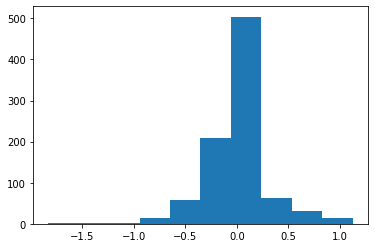

step:  81


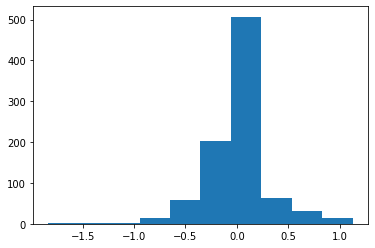

step:  82


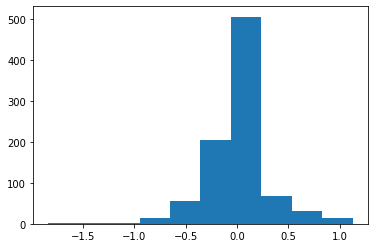

step:  83


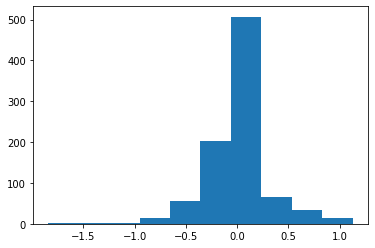

step:  84


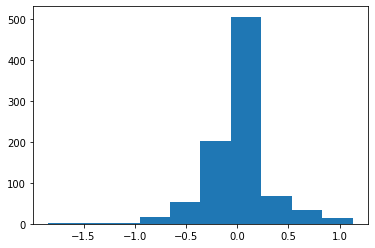

step:  85


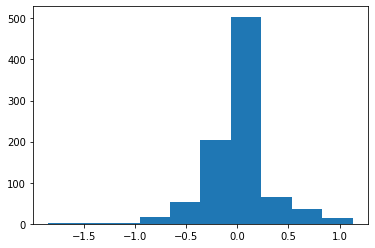

step:  86


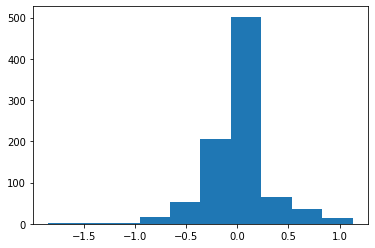

step:  87


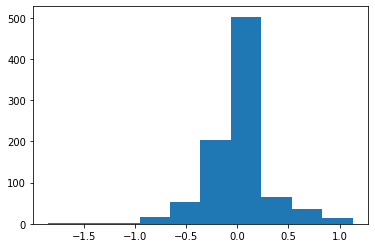

step:  88


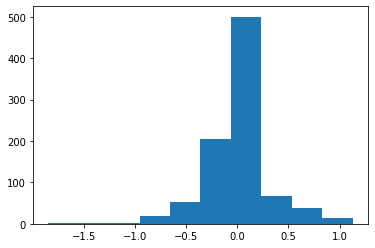

step:  89


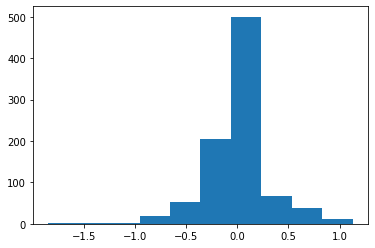

step:  90


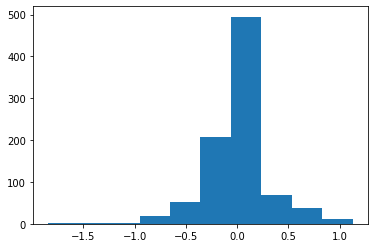

step:  91


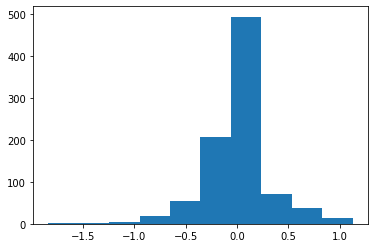

step:  92


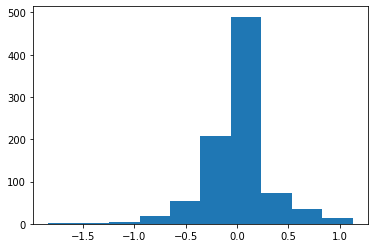

step:  93


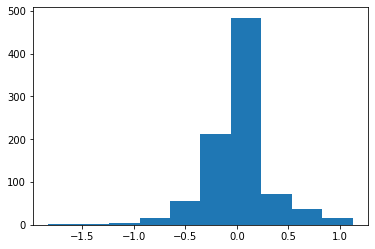

step:  94


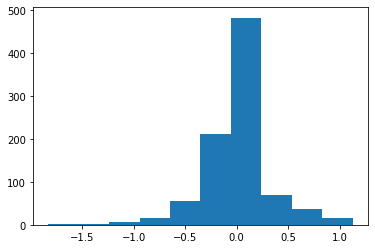

step:  95


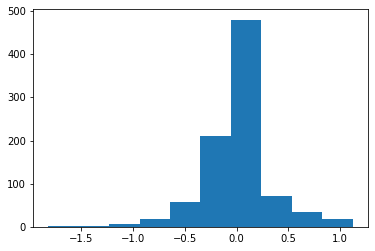

step:  96


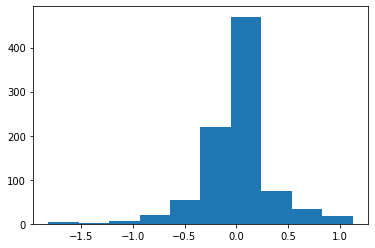

step:  97


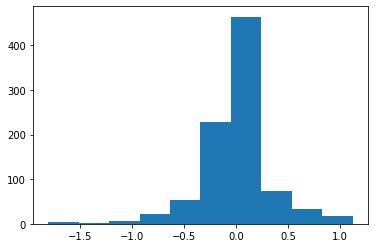

step:  98


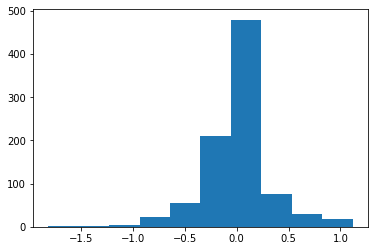

step:  99


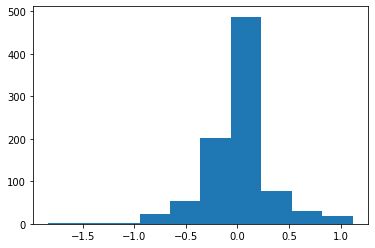

In [ ]:
torch.manual_seed(1)



np.random.seed(1)
mean0 = (1, 1)
#sigma = 0.5
rho = sigma * sigma

cov0 = [[rho, 0], [0, rho]]

mean1 = (-1, -1)
cov1 = [[rho, 0], [0, rho]]

data0 = np.random.multivariate_normal(mean0, cov0, 100)
data1 = np.random.multivariate_normal(mean1, cov1, 100)

data = np.concatenate((data0, data1))
#data1[:,1] = data1[:,1] - 2
#print(data0)

input = torch.tensor(data).float().cuda()


label = [torch.LongTensor(np.random.binomial(1, 0.3, 1)) for point in data0]
label += [torch.LongTensor(np.random.binomial(1, 0.7, 1)) for point in data1]

label = torch.tensor(label).cuda()

model1 = Net(num_classes = 2).cuda()
optimizer = Adam(model1.parameters(), lr=1e-3, betas=(0, 0.99))

model1.train()

#dataset_size = len(label)
#batchsize = 2


y_number = []
x_number = []
for i in range(100):
  print('step: ', i)
  x_number.append(i)
  optimizer.zero_grad()
  #batch_ind = np.random.randint(0, dataset_size, batchsize)

  #output = model1(input[batch_ind])
  output = model1(input)
  output = F.log_softmax(output, dim=0)

  #loss = F.nll_loss(output, label[batch_ind])
  loss = F.nll_loss(output, label)
  
  loss.backward()
  optimizer.step()
  if i % 100 == 0:
    #with torch.no_grad:
      #print(loss)
      #output = model1(input)
      #output = F.log_softmax(output, dim=0)
      #loss = F.nll_loss(output, label)
      
      #print(avgpred)
      pred = output.max(dim=1)[1]
      #print(pred == 0)
      avgpred1 = F.softmax(output, dim=1)[pred == 0].mean(dim=0)[0].item()
      avgpred2 = F.softmax(output, dim=1)[pred == 1].mean(dim=0)[1].item()
      avgpred = (avgpred1 + avgpred2)/2

      
      print(loss.item(), (pred == label).sum().float().item() / len(label), avgpred)
#correct[sigma] = (((pred == label).sum().float() / len(label)).item())
#losses[sigma] = loss.item()
#avg_pred[sigma] = avgpred

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
from sympy import init_printing
import scipy.stats as stats
init_printing()

In [ ]:
m = sympy.symbols('m')
x = sympy.symbols('x')

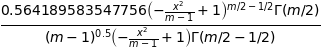

In [ ]:
f2 = (1/2)*((1/(m-1)**0.5))*((sympy.gamma(m/2))/(sympy.gamma((m-1)/2)*sympy.gamma(1/2)))*(2/(1-((x**2)/(m-1))))*((1-(x**2/(m-1)))**((m-1)/2))
f2

In [ ]:
results2 = []
x_value2 = []
for i in np.arange (-(2-1)**0.5,(2-1)**0.5,(((2-1)**0.5)*2)/100):
    if i == -(2-1)**0.5:
        pass
    else:
        f3 = f2.subs([(m,2),(x,i)])
        results2.append(f3)
        x_value2.append(i)

In [ ]:
results3 = []
x_value3 = []
for i in np.arange (-(3-1)**0.5,(3-1)**0.5,(((3-1)**0.5)*2)/100):
    if i == -(3-1)**0.5:
        pass
    else:
        f3 = f2.subs([(m,3),(x,i)])
        results3.append(f3)
        x_value3.append(i)

In [ ]:
results4 = []
x_value4 = []
for i in np.arange (-(4-1)**0.5,(4-1)**0.5,(((4-1)**0.5)*2)/100):
    if i == -(4-1)**0.5:
        pass
    else:
        f3 = f2.subs([(m,4),(x,i)])
        results4.append(f3)
        x_value4.append(i)

In [ ]:
results10 = []
x_value10 = []
for i in np.arange (-(10-1)**0.5,(10-1)**0.5,(((10-1)**0.5)*2)/100):
    if i == -(10-1)**0.5:
        pass
    else:
        f3 = f2.subs([(m,10),(x,i)])
        results10.append(f3)
        x_value10.append(i)

In [ ]:
results29 = []
x_value29 = []
for i in np.arange (-(29-1)**0.5,(29-1)**0.5,(((29-1)**0.5)*2)/100):
    if i == -(29-1)**0.5:
        pass
    else:
        f3 = f2.subs([(m,29),(x,i)])
        results29.append(f3)
        x_value29.append(i)

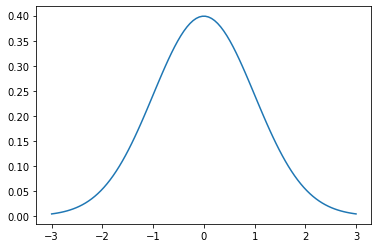

In [ ]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

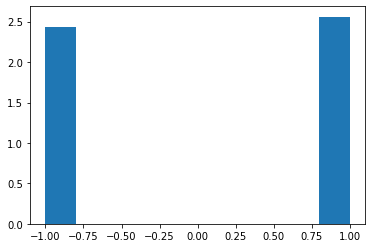

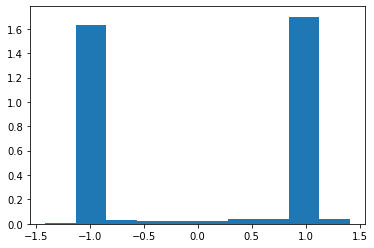

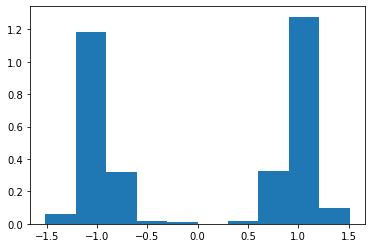

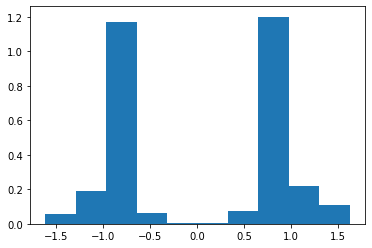

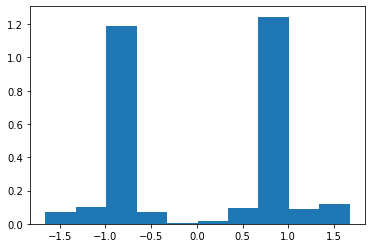

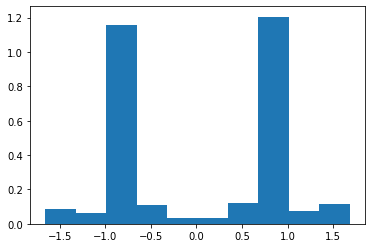

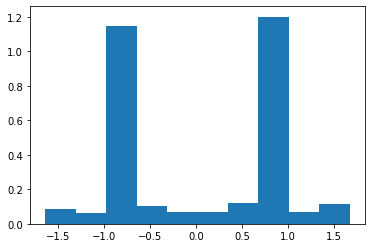

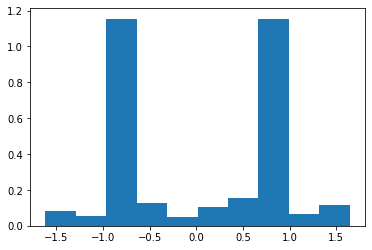

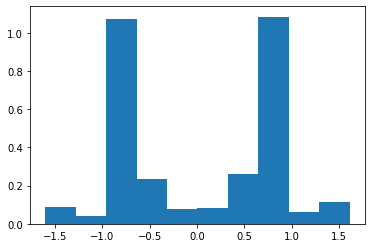

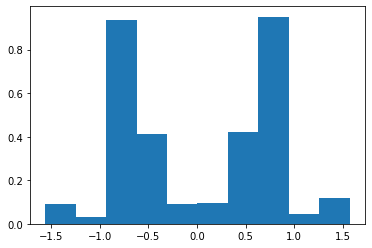

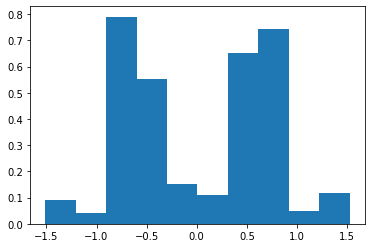

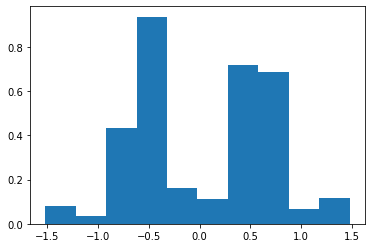

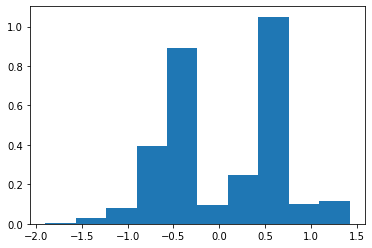

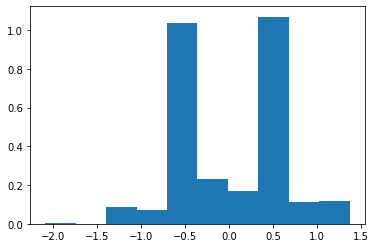

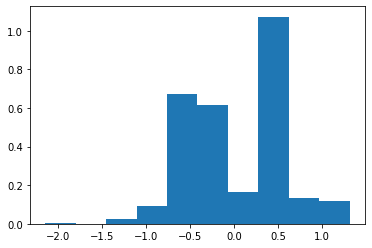

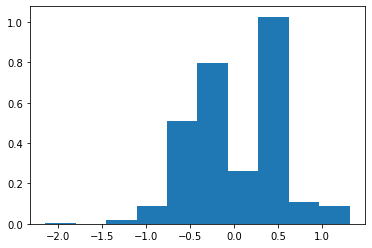

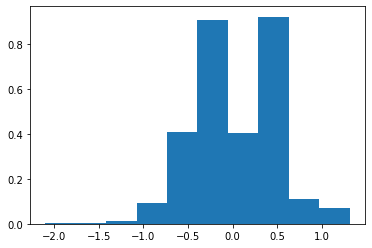

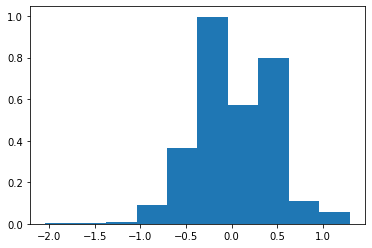

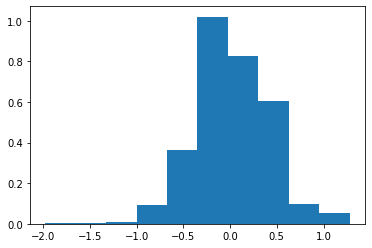

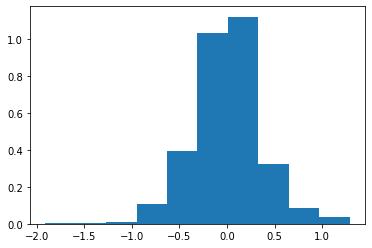

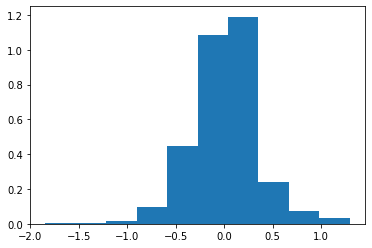

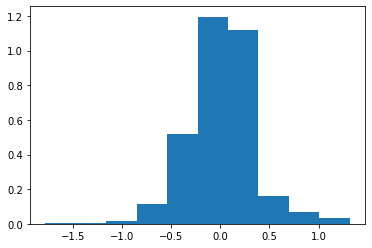

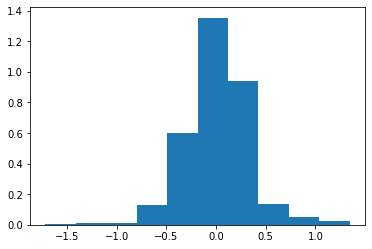

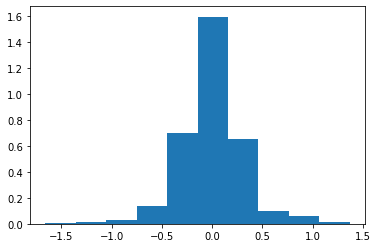

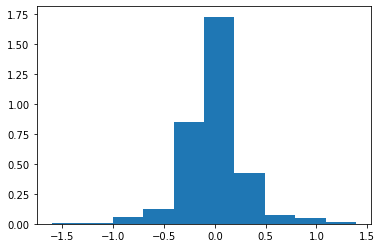

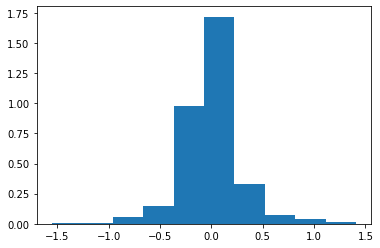

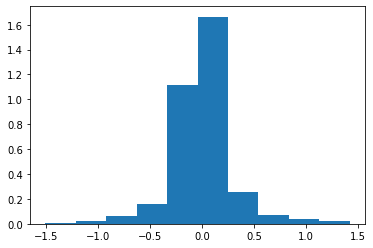

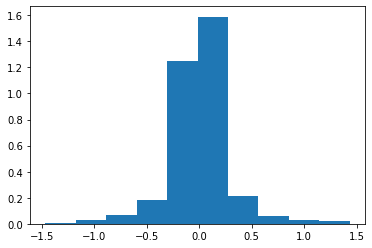

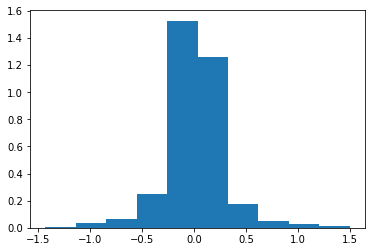

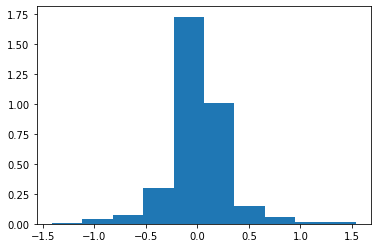

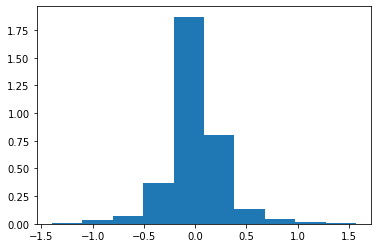

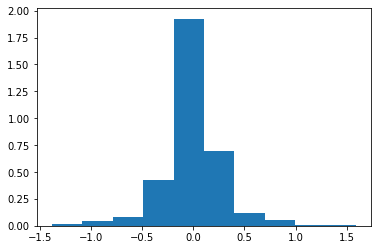

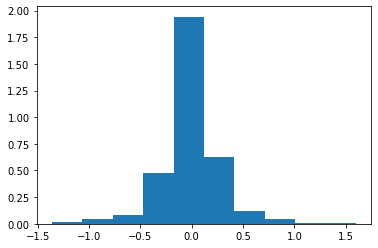

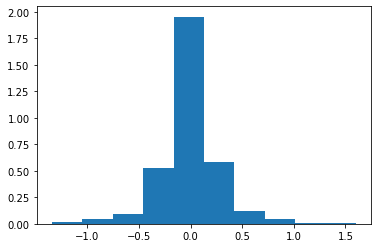

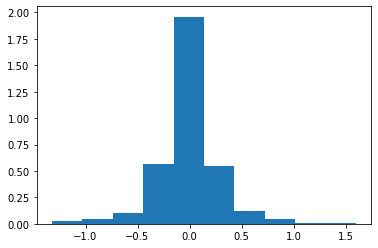

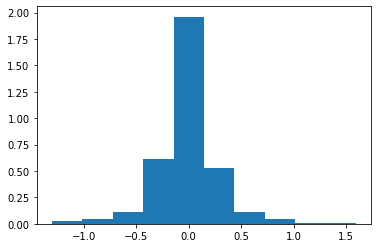

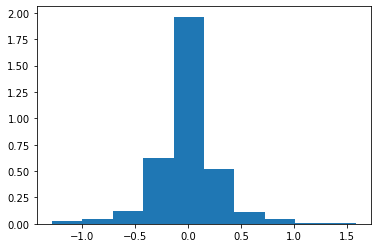

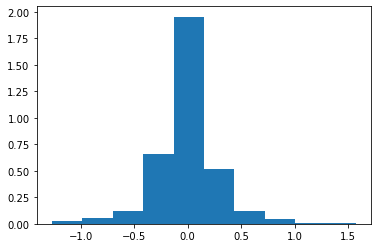

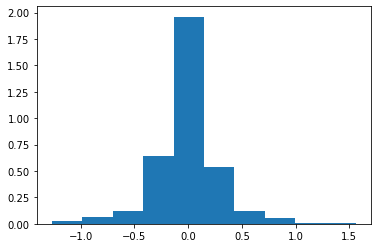

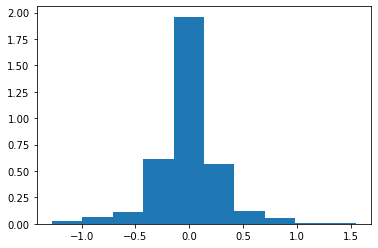

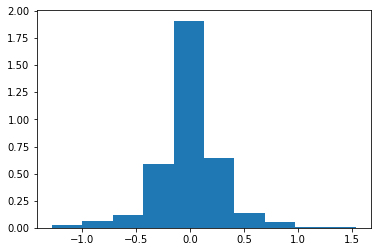

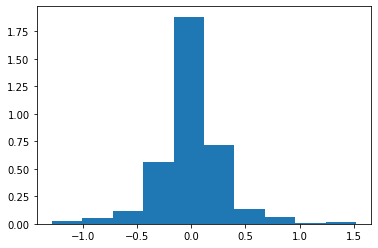

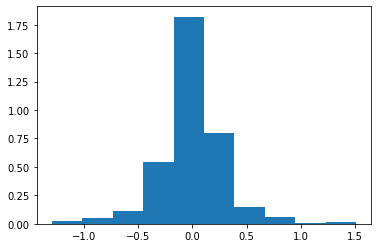

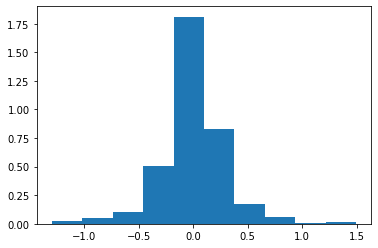

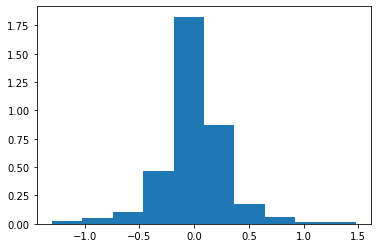

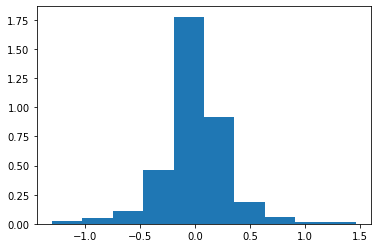

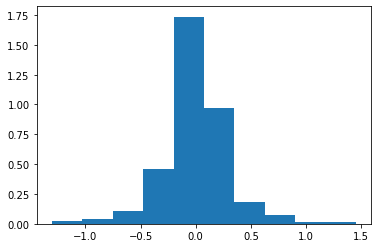

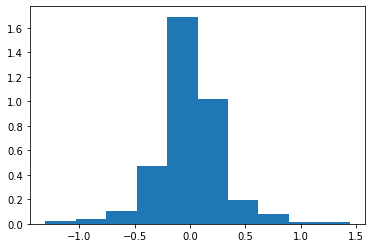

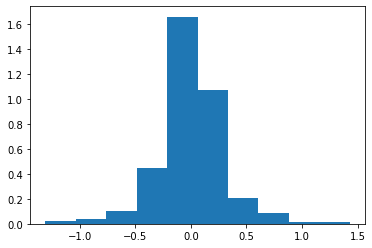

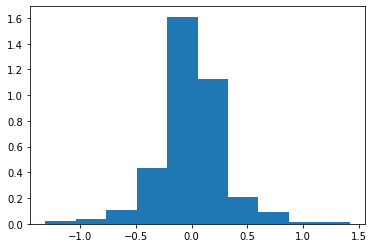

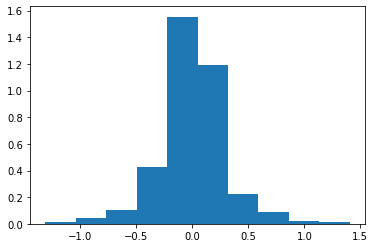

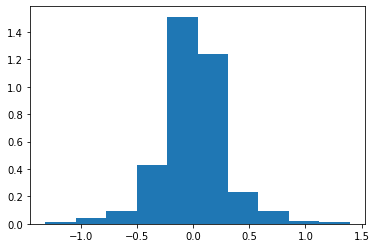

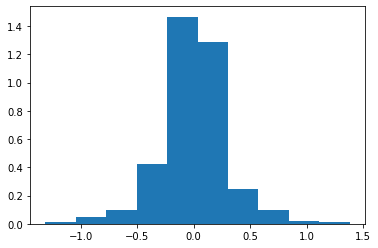

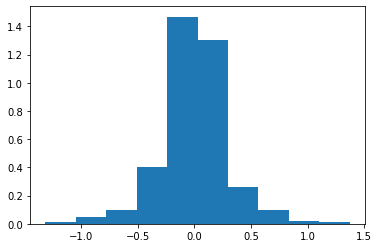

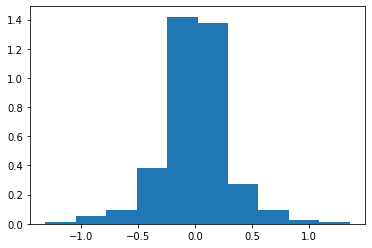

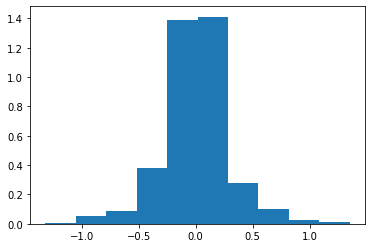

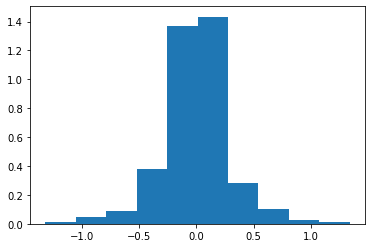

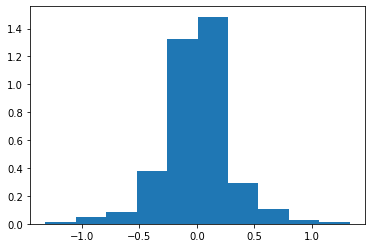

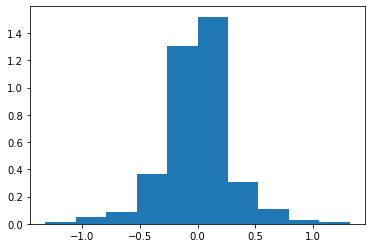

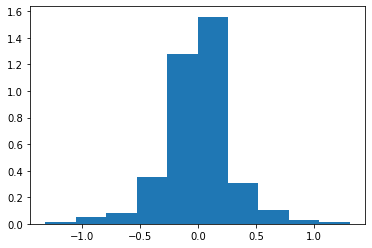

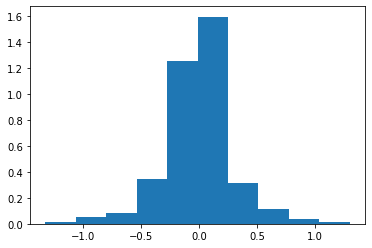

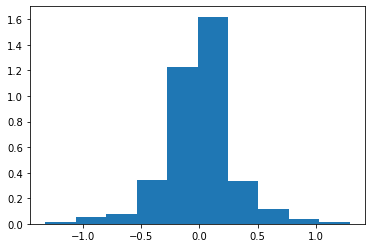

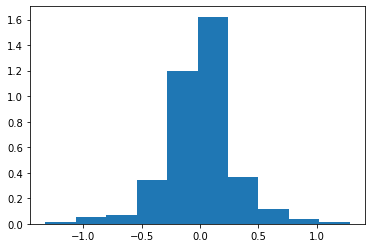

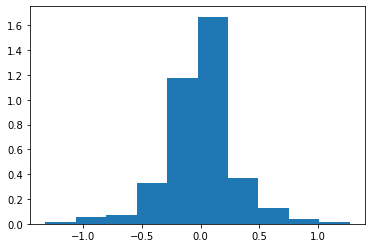

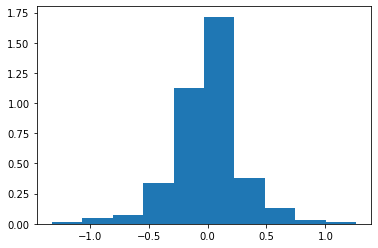

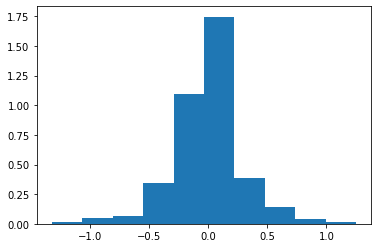

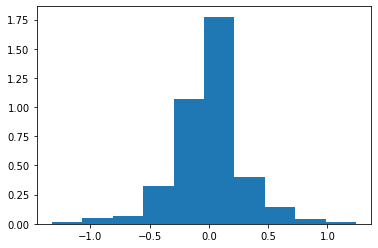

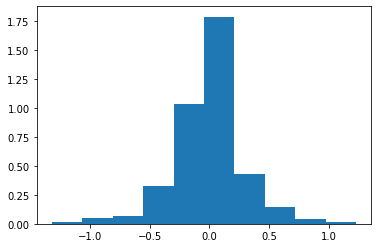

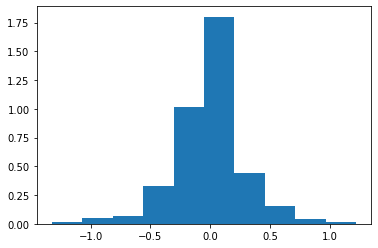

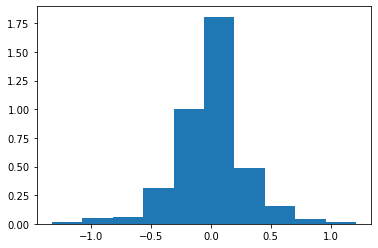

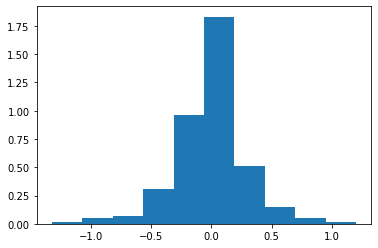

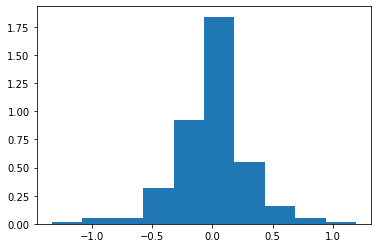

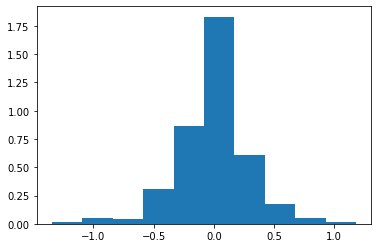

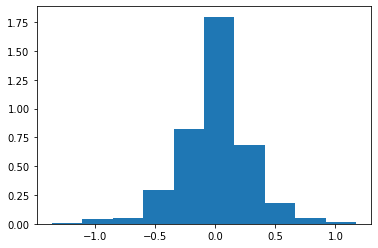

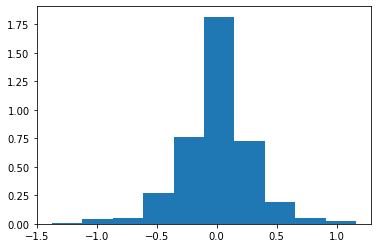

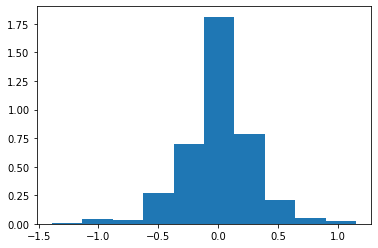

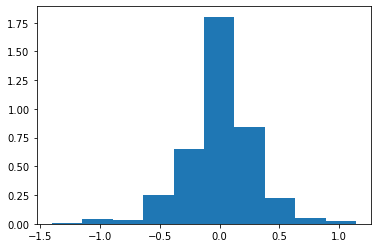

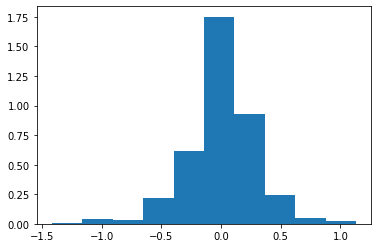

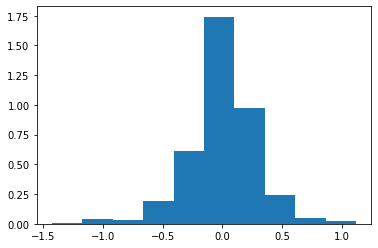

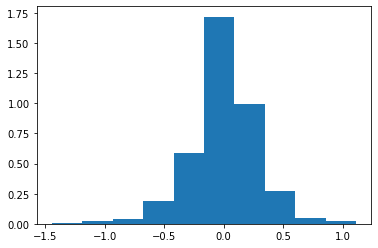

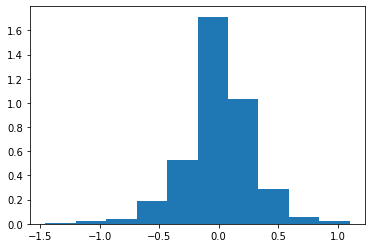

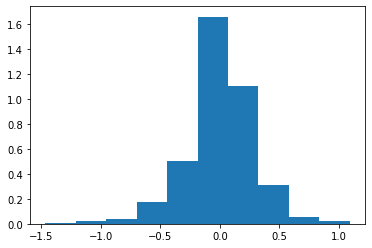

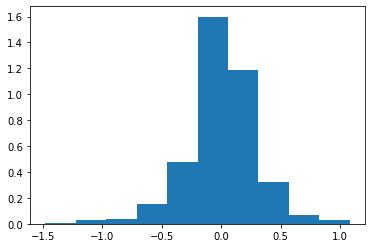

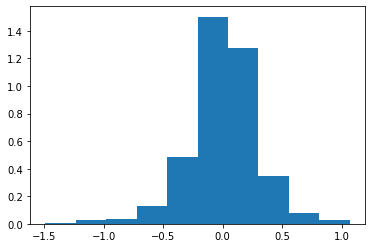

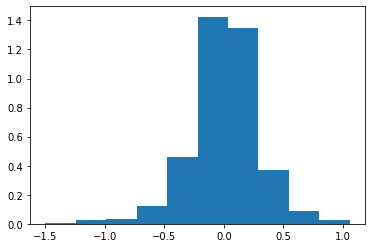

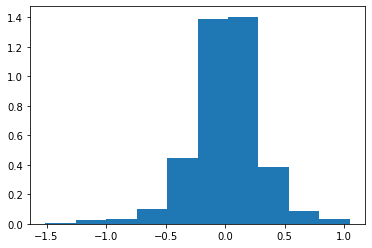

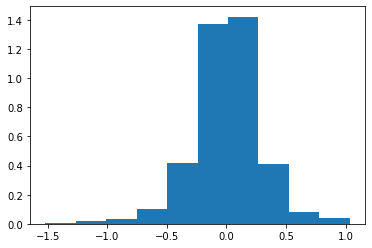

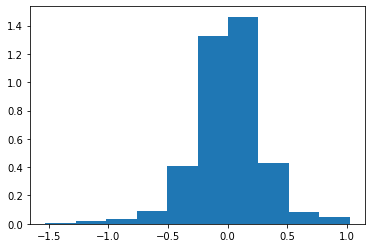

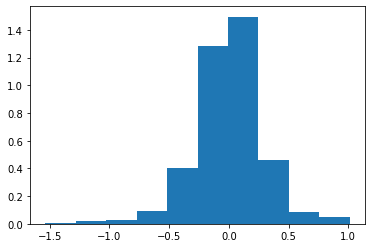

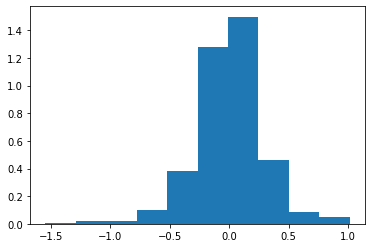

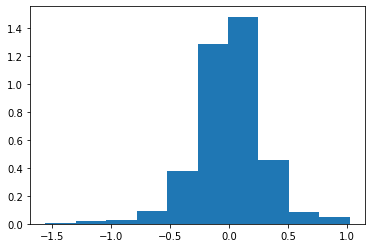

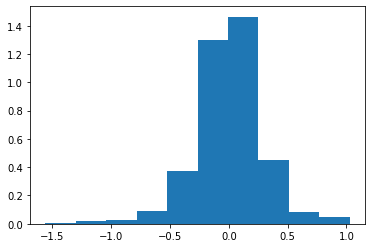

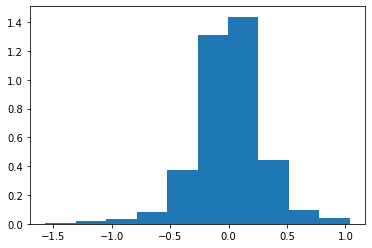

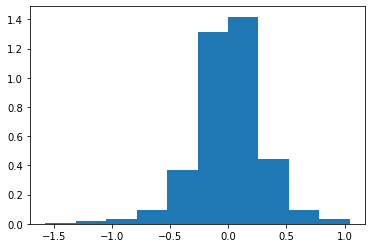

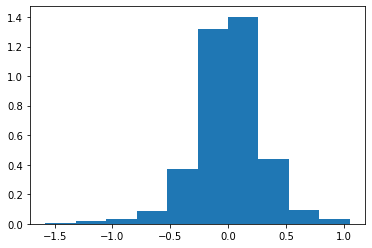

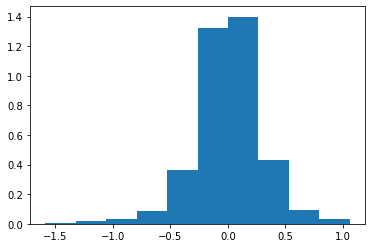

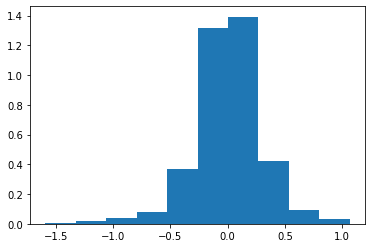

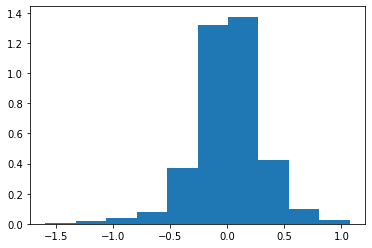

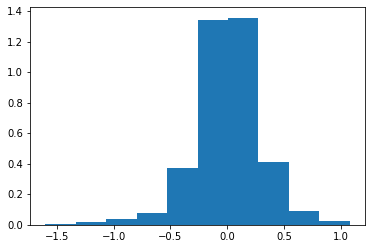

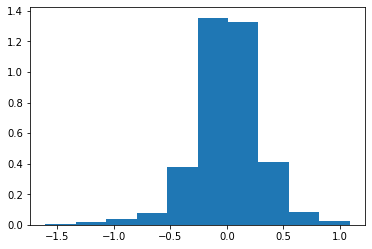

In [ ]:
vars = []
vars2 = []

for i in range(100):
  numbers = y_number[i]
  #print(numbers.cpu())
  vars.append(np.var(y_number[i].cpu().numpy()))
  vars2.append(np.var(np.absolute(y_number[i].cpu().numpy())))

  weights = np.ones_like(numbers.cpu())/len(numbers.cpu())
  plt.hist(numbers.cpu(), weights= weights,density=1,bins = 10)
  plt.show()
  plt.close()

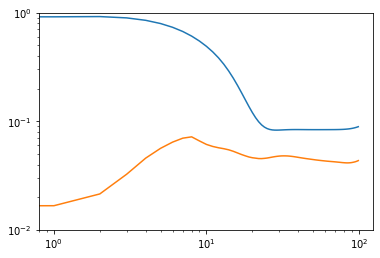

In [ ]:
plt.plot(vars)
plt.plot(vars2)

plt.yscale('log')
plt.xscale('log')
#### two variances ## Zhiyi
plt.ylim(0.01, 1)

<function matplotlib.pyplot.show>

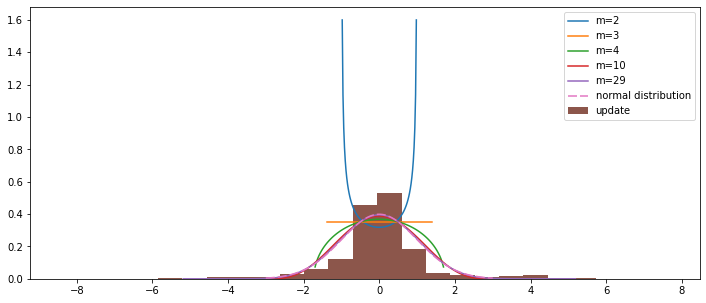

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(x_value2,results2,label="m=2")
plt.plot(x_value3,results3,label="m=3")
plt.plot(x_value4,results4,label="m=4")
plt.plot(x_value10,results10,label="m=10")
plt.plot(x_value29,results29,label="m=29")
weights = np.ones_like(y_number[30].cpu())/len(y_number[30].cpu())
plt.hist((y_number[30]*5 ).cpu(), weights= weights,bins = 25,density=1,label = "update")
plt.plot(x, stats.norm.pdf(x, mu, sigma),dashes=[6,2],label="normal distribution")
plt.legend()
plt.show

(array([0.01463226, 0.        , 0.        , 0.01463226, 0.0219484 ,
        0.01463226, 0.02926453, 0.05852905, 0.07316129, 0.10242584,
        0.38043883, 0.49749686, 0.70234854, 0.46823234, 0.28532912,
        0.10974197, 0.02194839, 0.02194839, 0.02194839, 0.03658065,
        0.0219484 , 0.        , 0.        , 0.00731613, 0.00731613]),
 array([-4.2423506 , -3.8989227 , -3.555495  , -3.2120671 , -2.8686392 ,
        -2.5252116 , -2.1817837 , -1.8383559 , -1.4949281 , -1.1515002 ,
        -0.80807245, -0.46464467, -0.12121685,  0.22221096,  0.5656388 ,
         0.90906656,  1.2524943 ,  1.5959222 ,  1.93935   ,  2.2827778 ,
         2.6262057 ,  2.9696333 ,  3.3130612 ,  3.6564891 ,  3.9999168 ,
         4.3433447 ], dtype=float32),
 <a list of 25 Patch objects>)

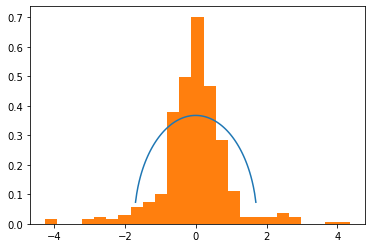

In [ ]:
plt.plot(x_value4,results4,label="m=2")
plt.hist((y_number[30] * 5).cpu(), weights= weights,bins = 25,density=1,label = "update")
